In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from tqdm import tqdm
import re
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
final_df = pd.read_csv('bit+cap+inf.csv')
final_df.columns

Index(['Inflation', 'Date', 'opening_price', 'highest_price', 'lowest_price',
       'closing_price', 'transactions_in_blockchain', 'avg_block_size',
       'sent_by_adress', 'avg_mining_difficulty', 'avg_hashrate',
       'mining_profitability', 'sent_coins_in_usd', 'avg_transaction_fees',
       'median_transaction_fees', 'avg_block_time', 'avg_transaction_value',
       'median_transaction_value', 'tweets', 'google_trends',
       'active_addresses', 'top100_to_total_percentage', 'avg_fee_to_reward',
       'number_of_coins_in_circulation', 'miner_revenue',
       'next_day_closing_price', 'mar_cap'],
      dtype='object')

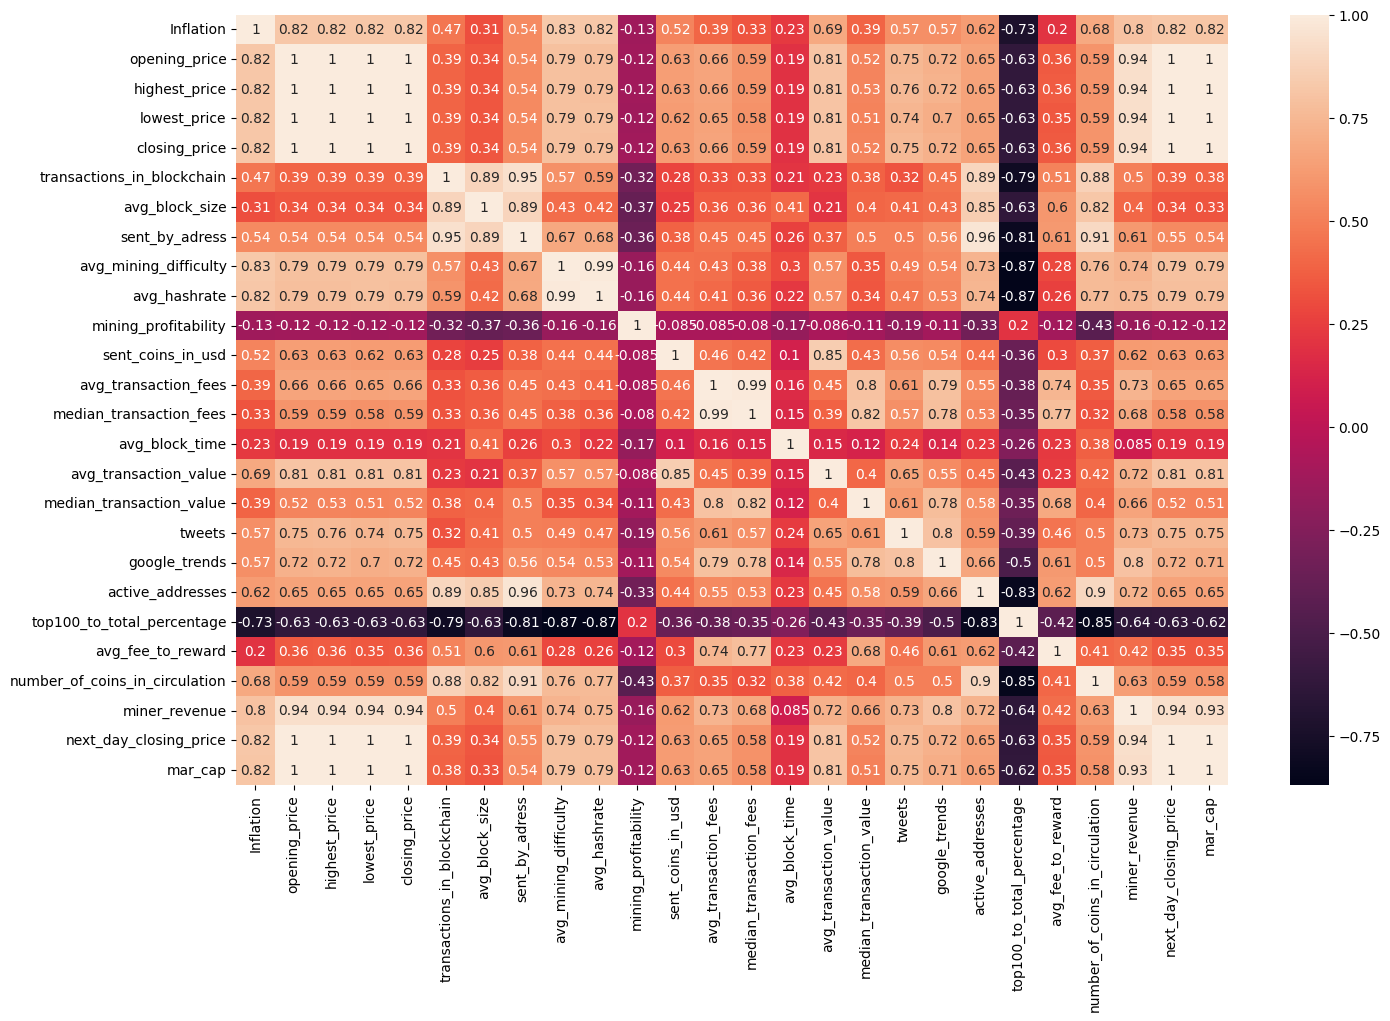

In [4]:
plot.figure(figsize=(16,10))
sns.heatmap(final_df.corr() , annot=True)
plot.show()

In [5]:
final_df.dropna()
final_df.drop(['Date'], inplace=True , axis=1)

In [6]:
final_df.shape

(3093, 26)

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3093 entries, 0 to 3092
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Inflation                       3093 non-null   float64
 1   opening_price                   3093 non-null   float64
 2   highest_price                   3093 non-null   float64
 3   lowest_price                    3093 non-null   float64
 4   closing_price                   3093 non-null   float64
 5   transactions_in_blockchain      3093 non-null   int64  
 6   avg_block_size                  3093 non-null   int64  
 7   sent_by_adress                  3093 non-null   int64  
 8   avg_mining_difficulty           3093 non-null   int64  
 9   avg_hashrate                    3093 non-null   float64
 10  mining_profitability            3093 non-null   float64
 11  sent_coins_in_usd               3093 non-null   int64  
 12  avg_transaction_fees            30

In [8]:
final_df.isnull().sum()

Inflation                         0
opening_price                     0
highest_price                     0
lowest_price                      0
closing_price                     0
transactions_in_blockchain        0
avg_block_size                    0
sent_by_adress                    0
avg_mining_difficulty             0
avg_hashrate                      0
mining_profitability              0
sent_coins_in_usd                 0
avg_transaction_fees              0
median_transaction_fees           0
avg_block_time                    0
avg_transaction_value             0
median_transaction_value          0
tweets                            0
google_trends                     0
active_addresses                  0
top100_to_total_percentage        0
avg_fee_to_reward                 0
number_of_coins_in_circulation    0
miner_revenue                     0
next_day_closing_price            0
mar_cap                           0
dtype: int64

In [9]:
final_df = final_df.dropna()

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = final_df.loc[: , final_df.columns != 'next_day_closing_price']
Y = final_df['next_day_closing_price']

In [11]:
from sklearn.feature_selection import f_regression
import operator
import math

def getTopFeatures(train_x, train_y, n_features=100):
    f_val, p_val = f_regression(train_x,train_y)
    f_val_dict = {}
    p_val_dict = {}
    for i in range(len(f_val)):
        if math.isnan(f_val[i]):
            f_val[i] = 0.0
        f_val_dict[i] = f_val[i]
        if math.isnan(p_val[i]):
            p_val[i] = 0.0
        p_val_dict[i] = p_val[i]
    
    sorted_f = sorted(f_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    sorted_p = sorted(p_val_dict.items(), key=operator.itemgetter(1),reverse=True)
    
    feature_indexs = []
    for i in range(0,n_features):
        feature_indexs.append(sorted_f[i][0])
    
    return feature_indexs

In [12]:
features = getTopFeatures(X,Y, n_features = 3)

In [13]:
train_df = final_df

In [14]:
train_df 

,Inflation,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,...,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,next_day_closing_price,mar_cap
0,101.8,93.0,106.0,92.2,104.0,52572,139256,48809,6695826,6.550211e+13,...,64.987,8193.0,15.248000,75756.0,19.962,0.867,10975275.00,4.818914e+05,118.0,1.023444e+09
1,101.8,104.0,118.4,99.0,118.0,63095,175443,62276,6695826,6.184560e+13,...,94.955,8193.0,17.192000,91875.0,20.024,1.338,10988125.00,5.312995e+05,135.0,1.525042e+09
2,101.8,118.0,147.0,110.0,135.0,63766,184209,69174,6695826,6.027037e+13,...,102.533,8193.0,26.608000,107142.0,19.987,1.596,10986575.00,5.384239e+05,132.1,1.289165e+09
3,101.8,135.0,142.1,116.4,132.1,66738,221568,71753,6695826,5.527246e+13,...,123.314,8193.0,24.681000,108890.0,19.990,1.948,10995725.00,5.251576e+05,142.3,1.581185e+09
4,101.8,132.1,144.9,130.2,142.3,61215,190067,69310,7005058,5.181545e+13,...,125.183,8193.0,20.514000,100034.0,19.833,1.432,10999925.00,6.064548e+05,142.6,1.567463e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,121.6,44950.2,47247.6,44718.7,47077.5,267959,599399,472333,18415156832118,1.555172e+20,...,717.117,91267.0,108.864900,793939.0,15.218,1.394,18816150.00,4.946986e+07,48130.6,8.835688e+11
3089,121.6,47070.8,48436.5,46743.9,48130.6,268815,736726,459889,18415156832118,1.330283e+20,...,773.643,109407.0,111.309556,823392.0,15.186,1.887,18817025.00,4.302687e+07,47748.0,9.035857e+11
3090,121.6,48132.3,48480.6,47040.3,47748.0,271087,817607,436025,18415156832118,1.302297e+20,...,719.701,90855.0,113.459125,879832.0,15.185,1.938,18817900.00,4.144786e+07,47282.8,8.938525e+11
3091,121.6,47748.2,48155.9,46788.8,47282.8,270893,720056,384965,18415156832118,1.272835e+20,...,714.990,101046.0,116.526571,823793.0,15.177,1.605,18818781.25,4.500074e+07,48306.7,8.896617e+11


In [15]:
train_df = final_df.loc[: , final_df.columns != 'next_day_closing_price']

In [16]:
train_df

,Inflation,opening_price,highest_price,lowest_price,closing_price,transactions_in_blockchain,avg_block_size,sent_by_adress,avg_mining_difficulty,avg_hashrate,...,avg_transaction_value,median_transaction_value,tweets,google_trends,active_addresses,top100_to_total_percentage,avg_fee_to_reward,number_of_coins_in_circulation,miner_revenue,mar_cap
0,101.8,93.0,106.0,92.2,104.0,52572,139256,48809,6695826,6.550211e+13,...,2592.0,64.987,8193.0,15.248000,75756.0,19.962,0.867,10975275.00,4.818914e+05,1.023444e+09
1,101.8,104.0,118.4,99.0,118.0,63095,175443,62276,6695826,6.184560e+13,...,4400.0,94.955,8193.0,17.192000,91875.0,20.024,1.338,10988125.00,5.312995e+05,1.525042e+09
2,101.8,118.0,147.0,110.0,135.0,63766,184209,69174,6695826,6.027037e+13,...,4478.0,102.533,8193.0,26.608000,107142.0,19.987,1.596,10986575.00,5.384239e+05,1.289165e+09
3,101.8,135.0,142.1,116.4,132.1,66738,221568,71753,6695826,5.527246e+13,...,4249.0,123.314,8193.0,24.681000,108890.0,19.990,1.948,10995725.00,5.251576e+05,1.581185e+09
4,101.8,132.1,144.9,130.2,142.3,61215,190067,69310,7005058,5.181545e+13,...,4348.0,125.183,8193.0,20.514000,100034.0,19.833,1.432,10999925.00,6.064548e+05,1.567463e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,121.6,44950.2,47247.6,44718.7,47077.5,267959,599399,472333,18415156832118,1.555172e+20,...,1932378.0,717.117,91267.0,108.864900,793939.0,15.218,1.394,18816150.00,4.946986e+07,8.835688e+11
3089,121.6,47070.8,48436.5,46743.9,48130.6,268815,736726,459889,18415156832118,1.330283e+20,...,702497.0,773.643,109407.0,111.309556,823392.0,15.186,1.887,18817025.00,4.302687e+07,9.035857e+11
3090,121.6,48132.3,48480.6,47040.3,47748.0,271087,817607,436025,18415156832118,1.302297e+20,...,766989.0,719.701,90855.0,113.459125,879832.0,15.185,1.938,18817900.00,4.144786e+07,8.938525e+11
3091,121.6,47748.2,48155.9,46788.8,47282.8,270893,720056,384965,18415156832118,1.272835e+20,...,612387.0,714.990,101046.0,116.526571,823793.0,15.177,1.605,18818781.25,4.500074e+07,8.896617e+11


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
train = train_df[:-600]
test = final_df[-600:]

In [19]:
x_train = train.copy()

In [20]:
y_train = final_df[:-600]['next_day_closing_price']

In [21]:
x_test = train_df[-600:]

In [22]:
y_test = final_df[-600:]['next_day_closing_price']

In [23]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [24]:
x_test.shape , x_train.shape , y_test.shape , y_train.shape

((600, 25), (2493, 25), (600, 1), (2493, 1))

In [25]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

rd_model = RandomForestRegressor()
rd_model.fit(x_train, y_train)

ln_model=LinearRegression()
ln_model.fit(x_train, y_train)

xg_model = XGBRegressor(n_estimators=1000)
xg_model.fit(x_train, y_train, verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
xg_predictions = xg_model.predict(x_test)
ln_predictions = ln_model.predict(x_test)
rd_predictions = rd_model.predict(x_test)

In [27]:
y_test.shape

(600, 1)

In [28]:
original_xg_predictions = scaler.inverse_transform(xg_predictions.reshape(-1,1))
original_ln_predictions = scaler.inverse_transform(ln_predictions.reshape(-1,1)) 
original_rd_predictions = scaler.inverse_transform(rd_predictions.reshape(-1,1)) 

original_y_test = scaler.inverse_transform(y_test.reshape(-1,1)) 

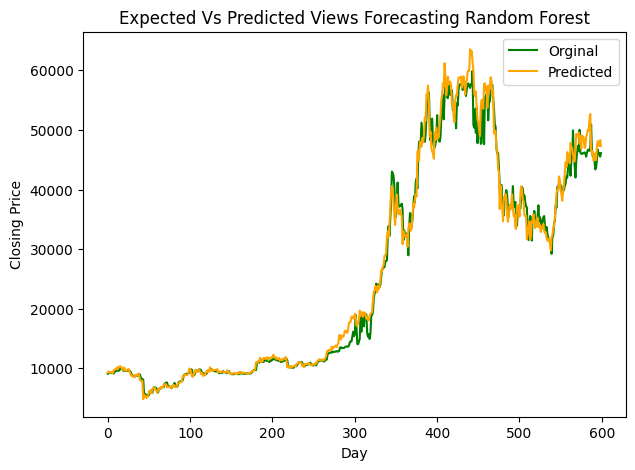

In [29]:
plot.figure(figsize=(7, 5))
test_day = [t for t in range(600)]
labels={'Orginal','Predicted'}
plot.plot(test_day, original_rd_predictions, color= 'green')
plot.plot(test_day, original_y_test, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting Random Forest')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

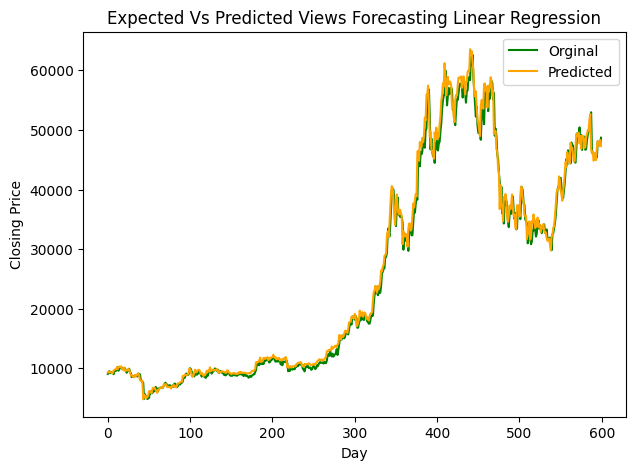

In [34]:
plot.figure(figsize=(7, 5))
test_day = [t for t in range(600)]
labels={'Orginal','Predicted'}
plot.plot(test_day, original_ln_predictions, color= 'green')
plot.plot(test_day, original_y_test, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting Linear Regression')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

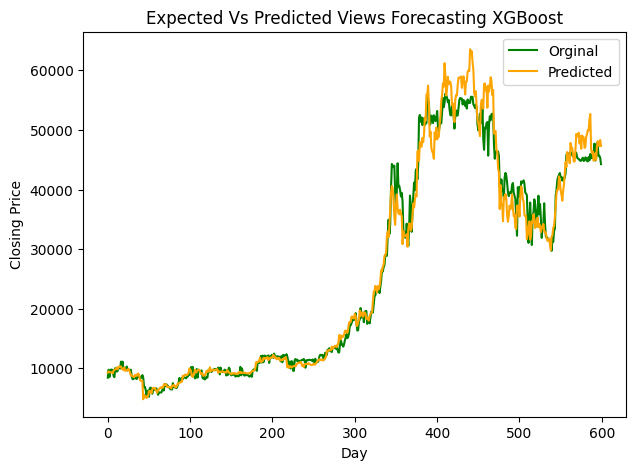

In [35]:
plot.figure(figsize=(7, 5))
test_day = [t for t in range(600)]
labels={'Orginal','Predicted'}
plot.plot(test_day, original_xg_predictions, color= 'green')
plot.plot(test_day, original_y_test, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting XGBoost')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [32]:
print("RMSE Random Forest: " + str(math.sqrt(mean_squared_error(original_rd_predictions, original_y_test))))
print("RMSE Linear Reg: " + str(math.sqrt(mean_squared_error(original_ln_predictions, original_y_test))))
print("RMSE XGBoost: " + str(math.sqrt(mean_squared_error(original_xg_predictions, original_y_test))))

RMSE Random Forest: 1933.0951517364063
RMSE Linear Reg: 1486.3313133870968
RMSE XGBoost: 2435.297976029741
